# headings+ comments



In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob  # for sentiment
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("default")


In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\anita\Downloads\test.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


In [4]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])


# Task 1 : Sentiment Labeling

In [6]:
!pip install textblob



In [7]:
!python -m textblob.download_corpora


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\anita\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\anita\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\anita\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\anita\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [8]:
import pandas as pd
from textblob import TextBlob

df = pd.read_csv(r"C:\Users\anita\Downloads\test.csv")


def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["body"].apply(get_sentiment)

df.head()
df.to_csv("labeled.csv", index=False)


In [9]:
df.columns


Index(['Subject', 'body', 'date', 'from', 'Sentiment'], dtype='object')

In [10]:
df["Sentiment"]

0       Positive
1       Negative
2        Neutral
3       Negative
4       Negative
          ...   
2186    Positive
2187    Positive
2188    Positive
2189    Positive
2190     Neutral
Name: Sentiment, Length: 2191, dtype: object

# Task 2 : EDA

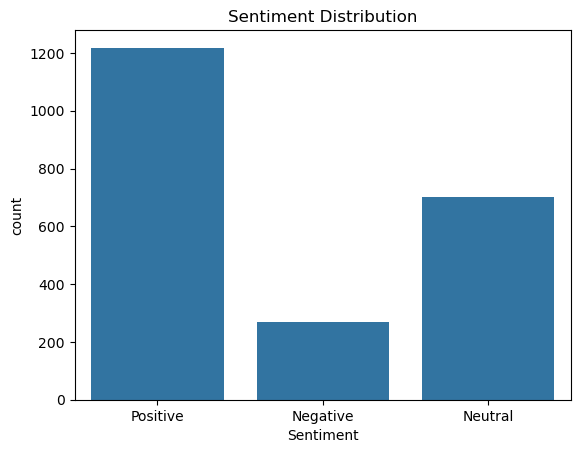

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.savefig("plots/sentiment_distribution.png")
plt.show()





# Sentiment over time (line plot)

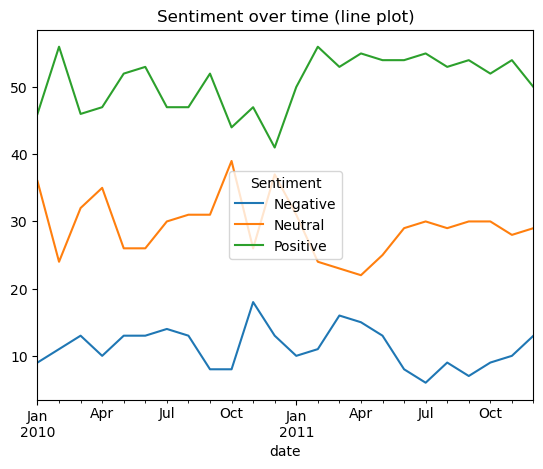

In [12]:
df['date'] = pd.to_datetime(df['date'])
df.groupby(df['date'].dt.to_period('M'))['Sentiment'].value_counts().unstack().plot(kind='line')
plt.title("Sentiment over time (line plot)")
plt.savefig("plots/Sentiment over time (line plot).png")
plt.show()



# Sentiment distribution per employee

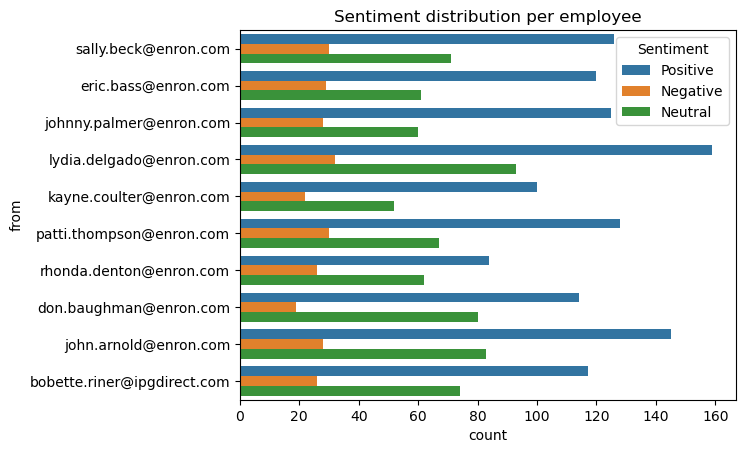

In [13]:
sns.countplot(data=df, y="from", hue="Sentiment")
plt.title("Sentiment distribution per employee")
plt.savefig("plots/Sentiment distribution per employee.png")
plt.show()




# Task 3 : Monthly Sentiment Score

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.to_period("M")
df['Score'] = df['Sentiment'].map({"Positive": 1, "Negative": -1, "Neutral": 0})

monthly_score = df.groupby(['from', 'Month'])['Score'].sum().reset_index()
monthly_score.columns = ['Employee', 'Month', 'SentimentScore']
monthly_score.head()


,Employee,Month,SentimentScore
0,bobette.riner@ipgdirect.com,2010-01,2
1,bobette.riner@ipgdirect.com,2010-02,8
2,bobette.riner@ipgdirect.com,2010-03,4
3,bobette.riner@ipgdirect.com,2010-04,4
4,bobette.riner@ipgdirect.com,2010-05,2


# Task 4 : Employee Ranking

In [16]:
ranking = monthly_score.sort_values(
    ['Month', 'SentimentScore', 'Employee'],
    ascending=[True, False, True]
)


# Employee Ranking (Top 3 positive & negative per month)

In [17]:
top_positive = ranking.groupby('Month').head(3)


In [18]:
top_negative = ranking.groupby('Month').tail(3)


In [19]:
print("Top 3 Positive Employees per Month:")
print(top_positive)

print("\nTop 3 Negative Employees per Month:")
print(top_negative)



Top 3 Positive Employees per Month:
                        Employee    Month  SentimentScore
120      kayne.coulter@enron.com  2010-01               9
24        don.baughman@enron.com  2010-01               5
48           eric.bass@enron.com  2010-01               5
73         john.arnold@enron.com  2010-02              10
1    bobette.riner@ipgdirect.com  2010-02               8
..                           ...      ...             ...
22   bobette.riner@ipgdirect.com  2011-11               8
142      kayne.coulter@enron.com  2011-11               7
167      lydia.delgado@enron.com  2011-12               6
191     patti.thompson@enron.com  2011-12               6
143      kayne.coulter@enron.com  2011-12               5

[72 rows x 3 columns]

Top 3 Negative Employees per Month:
                        Employee    Month  SentimentScore
96       johnny.palmer@enron.com  2010-01               2
216         sally.beck@enron.com  2010-01               2
192      rhonda.denton@enron.com  

# Task 5 : Flight Risk Identification

In [20]:

neg = df[df['Sentiment'] == "Negative"].copy()
neg = neg.sort_values(['from', 'date'])
flight_risk = []
for emp, group in neg.groupby('from'):
    dates = group['date'].tolist()
    for i in range(len(dates)):
        count_30 = sum((dates[j] - dates[i]).days <= 30 for j in range(i, len(dates)))
        if count_30 >= 4:
            flight_risk.append(emp)
            break
flight_risk = list(set(flight_risk))
print("Flight Risk Employees:", flight_risk)


Flight Risk Employees: ['bobette.riner@ipgdirect.com', 'rhonda.denton@enron.com', 'patti.thompson@enron.com', 'sally.beck@enron.com', 'john.arnold@enron.com', 'lydia.delgado@enron.com', 'don.baughman@enron.com', 'eric.bass@enron.com', 'johnny.palmer@enron.com', 'kayne.coulter@enron.com']


In [21]:
df.columns


Index(['Subject', 'body', 'date', 'from', 'Sentiment', 'word_count',
       'message_length', 'Month', 'Score'],
      dtype='object')

# Task 6: Linear Regression Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Word count and message length
df['word_count'] = df['body'].apply(lambda x: len(str(x).split()))
df['message_length'] = df['body'].apply(lambda x: len(str(x)))

# Aggregate required monthly data per employee
model_data = df.groupby(['from', 'Month']).agg({
    'Score': 'sum',
    'body': 'count',
    'word_count': 'mean',
    'message_length': 'mean'
}).reset_index()

# Rename columns
model_data.columns = ['Employee', 'Month', 'SentimentScore', 'MessageCount', 'AvgWordCount', 'AvgMessageLength']

# Convert Month → numeric (needed for regression)
model_data['MonthNum'] = model_data['Month'].astype(str).str[-2:].astype(int)

# Features and target
X = model_data[['MonthNum', 'MessageCount', 'AvgWordCount', 'AvgMessageLength']]
y = model_data['SentimentScore']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 4.1936292951939205
R² Score: 0.5390209019023477
